# 0 Imports

In [7]:
import dtale
import pickle
import datetime

import numpy            as np
import pandas           as pd
import seaborn          as sns
import plotly.express   as px

from matplotlib import pyplot as plt

from IPython.display        import Image
from IPython.core.display   import HTML

In [4]:
# Supressão da notação científica.
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.6f}'.format)

## 0.1 Funções Suporte

In [5]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [18,8]
    plt.rcParams['font.size'] = 16
    
    display( HTML('<style>.container { width: 100% !important;} </style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False)
    
    sns.set()
    
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [6]:
def estatistica_descritiva(df1):
    # Medidas de tendência central - Mean, Median
    media = pd.DataFrame(df1.apply(np.mean)).T
    mediana = pd.DataFrame(df1.apply(np.median)).T
    
    # Medidas de Dispersão - Std, min, max, range, skew, kurtosis
    desvio_padrao = pd.DataFrame(df1.apply(np.std)).T
    minimo = pd.DataFrame(df1.apply(np.min)).T
    maximo = pd.DataFrame(df1.apply(np.max)).T
    range = pd.DataFrame(df1.apply(lambda x : x.max() - x.min())).T
    assimetria = pd.DataFrame(df1.apply(lambda x : x.skew())).T
    curtosis = pd.DataFrame(df1.apply(lambda x : x.kurtosis())).T
    
    estatistica = pd.concat([minimo, maximo, range, media, mediana, desvio_padrao, assimetria, curtosis]).T.reset_index()
    estatistica.columns = ['variaveis','minimo', 'maximo', 'range', 'media', 'mediana', 'desvio_padrao', 'assimetria', 'curtosis']
    
    return estatistica

In [3]:
def exportar_df(df: pd.DataFrame):
    df.to_pickle(f'{__CAMINHO_INTERIM}/db_ajustado.pkl')

## 0.2 Load Data

In [4]:
__CAMINHO_INTERIM = '../data/interim'

df = pickle.load(open(f"{__CAMINHO_INTERIM}/db_ajustado.pkl","rb"))
df.head()

,subscription_name,subscription_guid,date,resource_guid,service_name,service_type,service_region,service_resource,quantity,cost,maquina,year,month,day,week_of_year,year_week,year_month
0,Microsoft Azure Sponsorship,0b1856f5-ffb1-4fb2-9b31-ebc3ddeacf68,2021-10-11,c80a3636-2edb-4248-bcb1-04ef818a75ac,Storage,Standard Page Blob,All,Disk Write Operations,0.2880,0.000096,ceaec,2021,10,11,41,2021-41,2021-10
1,Microsoft Azure Sponsorship,0b1856f5-ffb1-4fb2-9b31-ebc3ddeacf68,2021-10-12,c80a3636-2edb-4248-bcb1-04ef818a75ac,Storage,Standard Page Blob,All,Disk Write Operations,0.2879,0.000096,ceaec,2021,10,12,41,2021-41,2021-10
2,Microsoft Azure Sponsorship,0b1856f5-ffb1-4fb2-9b31-ebc3ddeacf68,2021-10-13,c80a3636-2edb-4248-bcb1-04ef818a75ac,Storage,Standard Page Blob,All,Disk Write Operations,0.2880,0.000096,ceaec,2021,10,13,41,2021-41,2021-10
3,Microsoft Azure Sponsorship,0b1856f5-ffb1-4fb2-9b31-ebc3ddeacf68,2021-10-14,c80a3636-2edb-4248-bcb1-04ef818a75ac,Storage,Standard Page Blob,All,Disk Write Operations,0.2883,0.000096,ceaec,2021,10,14,41,2021-41,2021-10
4,Microsoft Azure Sponsorship,0b1856f5-ffb1-4fb2-9b31-ebc3ddeacf68,2021-10-15,c80a3636-2edb-4248-bcb1-04ef818a75ac,Storage,Standard Page Blob,All,Disk Write Operations,0.2879,0.000096,ceaec,2021,10,15,41,2021-41,2021-10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56933 entries, 0 to 56932
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   subscription_name  56933 non-null  object        
 1   subscription_guid  56933 non-null  object        
 2   date               56933 non-null  datetime64[ns]
 3   resource_guid      56933 non-null  object        
 4   service_name       56933 non-null  object        
 5   service_type       56933 non-null  object        
 6   service_region     56933 non-null  object        
 7   service_resource   56933 non-null  object        
 8   quantity           56933 non-null  float64       
 9   cost               56933 non-null  float64       
 10  maquina            56933 non-null  object        
 11  year               56933 non-null  int32         
 12  month              56933 non-null  int32         
 13  day                56933 non-null  int32         
 14  week_o

# 2.0 EDA pré Feature Engineering

## 2.1 DTail

In [ ]:
""" # Assigning a reference to a running D-Tale process
d = dtale.show(df)

# Accessing data associated with D-Tale process
tmp = d.data.copy()
tmp['d'] = 4

# Altering data associated with D-Tale process
# FYI: this will clear any front-end settings you have at the time for this process (filter, sorts, formatting)
d.data = tmp

# Shutting down D-Tale process
#d.kill()

# using Python's `webbrowser` package it will try and open your server's default browser to this process
d.open_browser()

# There is also some helpful metadata about the process
d._data_id  # the process's data identifier
d._url  # the url to access the process

d2 = dtale.get_instance(d._data_id)  # returns a new reference to the instance running at that data_id

dtale.instances()  # prints a list of all ids & urls of running D-Tale sessions """

In [ ]:
#d.kill()

2024-10-28 13:03:41,269 - INFO     - Executing shutdown due to inactivity...


## Outros Gráficos

In [63]:
df.columns

Index(['subscription_name', 'subscription_guid', 'date', 'resource_guid',
       'service_name', 'service_type', 'service_region', 'service_resource',
       'quantity', 'cost', 'year', 'month', 'day', 'week_of_year', 'year_week',
       'year_month'],
      dtype='object')

In [17]:
df_new = df.loc[:,['date','service_name','cost']]

In [ ]:
df_new.info()

In [34]:
""" sns.histplot(
    data=df_new,
    x='service_name',
    stat='count',
    edgecolor='black',
    alpha=0.7
) """

df_new_2 = df_new.loc[:,['service_name','cost']].groupby('service_name').sum().sort_values(by='cost').reset_index()

fig = px.line(
    data_frame= df_new_2,
    x = 'service_name',
    y = 'cost',
    title='Evolução do Custo por Serviço',
    labels={'service_name': 'Nome do Serviço', 'cost': 'Custo Total (R$)'},
    markers=True,
    height=600,
    width=800,
)

# Personalizando os marcadores
""" fig.update_traces(
    marker=dict(
        symbol='circle',
        size=5,  # Tamanho dos marcadores
        color='blue'  # Cor dos marcadores
    )
) """
fig.show()

# ======

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

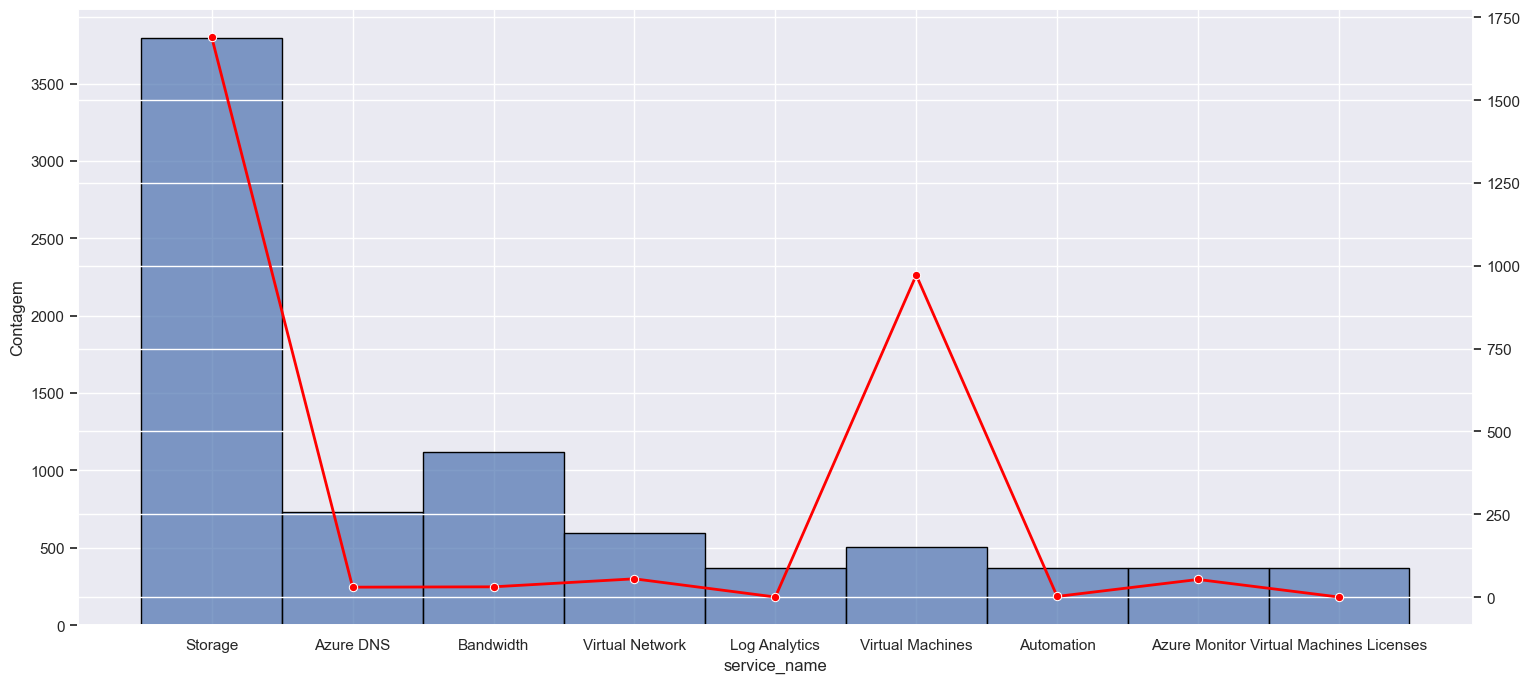

In [14]:
#df_line = df.loc[df['service_name'].isin(['Bandwidth', 'Storage', 'Virtual Network', 'Virtual Machines', 'Azure DNS']),\
#                ['service_name','cost']]\
#                .groupby('service_name').sum().reset_index()
df_line = df.loc[:,['service_name','cost']].groupby('service_name').sum().reset_index()

df_hist = df.loc[:,['service_name']]

# Criar um eixo principal para o histograma
ax1 = plt.gca()

# Histograma mostrando a contagem de 'service_name'
sns.histplot(
    data=df_hist,
    x='service_name',
    ax=ax1,
    stat='count',
    edgecolor='black',
    alpha=0.7
)

# Adicionar rótulo ao eixo y para o histograma
ax1.set_ylabel('Contagem')
ax1.tick_params(axis='y')

# Criar um segundo eixo y para a linha do custo
ax2 = ax1.twinx()

# Plotar a linha do custo
sns.lineplot(
    data=df_line,
    x='service_name',
    y='cost',
    ax=ax2,
    marker='o',
    color = 'red',
    linewidth=2,
    label='Cost'
)

# Adicionar rótulo ao eixo y para o custo
ax2.set_ylabel('Custo', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Melhorar a legibilidade
plt.title('Contagem de Service Name e Custo')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

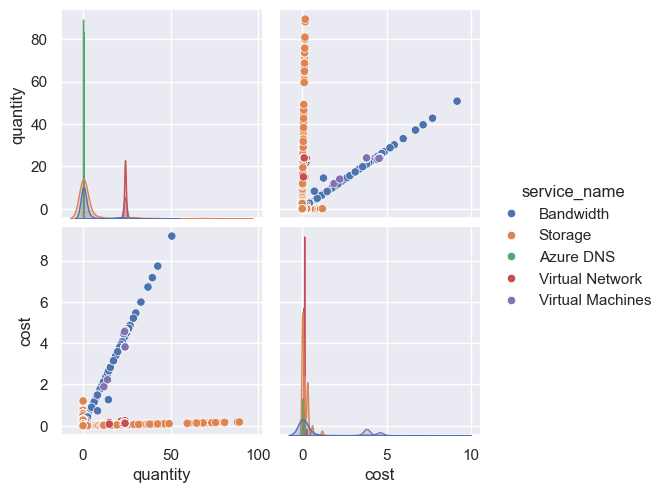

In [38]:
df_pairplot = df.loc[df['service_name'].isin(['Bandwidth','Storage','Virtual Network','Virtual Machines','Azure DNS']),:]
sns.pairplot(df_pairplot, hue="service_name")

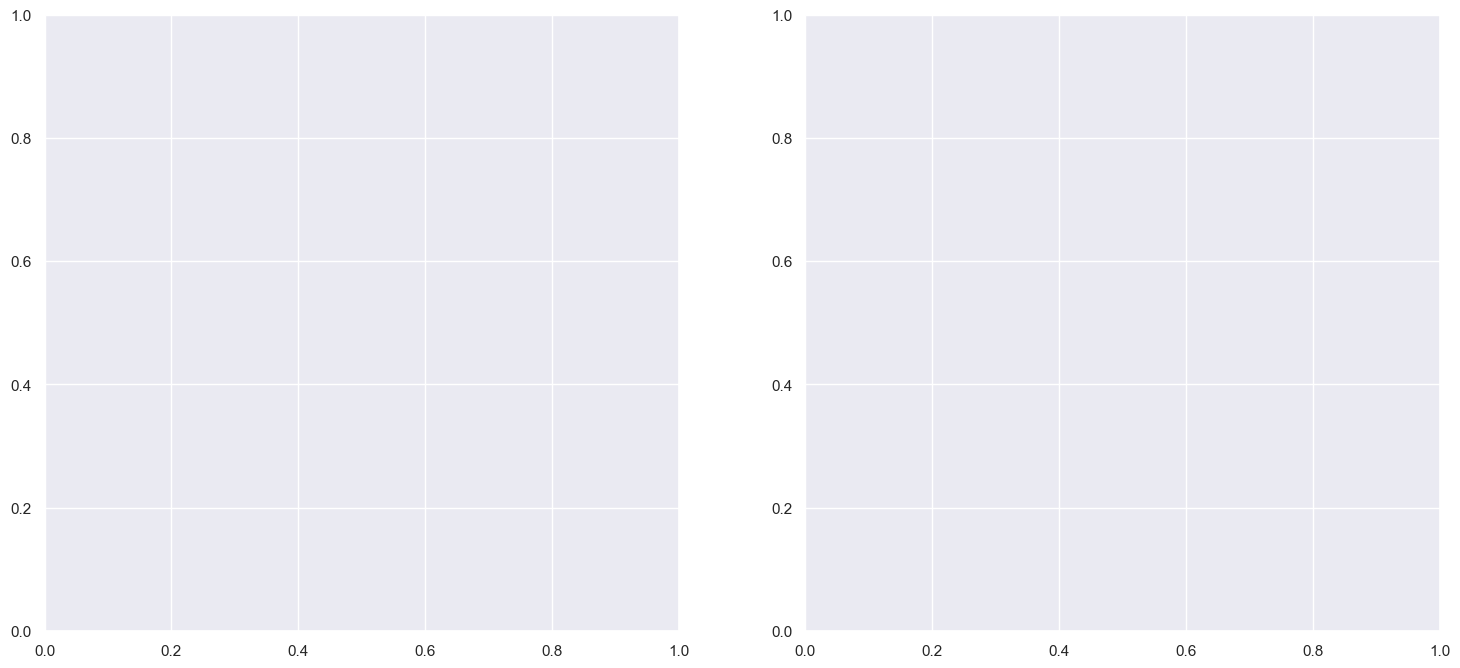

In [48]:
df_line_2 = df_new.loc[:,['cost','date','service_name']]\
                        .groupby(['date'])\
                        .sum().sort_values(by='date').reset_index()

fig = px.line(
    data_frame= df_line_2,
    x = 'date',
    y = 'cost',
    title='Evolução do Custo Geral',
    labels={'date': 'Data', 'cost': 'Custo Total (R$)'}
)
fig.show()

df_line_2 = df_new.loc[:,['cost','date','service_name']]\
                        .groupby(['date','service_name'])\
                        .sum().sort_values(by='date').reset_index()

fig = px.line(
    data_frame= df_line_2,
    x = 'date',
    y = 'cost',
    color='service_name',
    title='Evolução do Custo por Serviço',
    labels={'date': 'Data', 'cost': 'Custo Total (R$)'}
)
fig.show()

In [ ]:
df_sem_function = df_new.loc[:,['cost','date']].groupby(['date']).sum().reset_index()

valor_medio = df_sem_function.loc[df_sem_function['date']> "2024-02-01",['cost']]

In [52]:
estatistica_descritiva(valor_medio)

,variaveis,minimo,maximo,range,media,mediana,desvio_padrao,assimetria,curtosis
0,cost,6.358368,7.375631,1.017263,6.817358,6.942226,0.274582,-0.419614,-1.228333


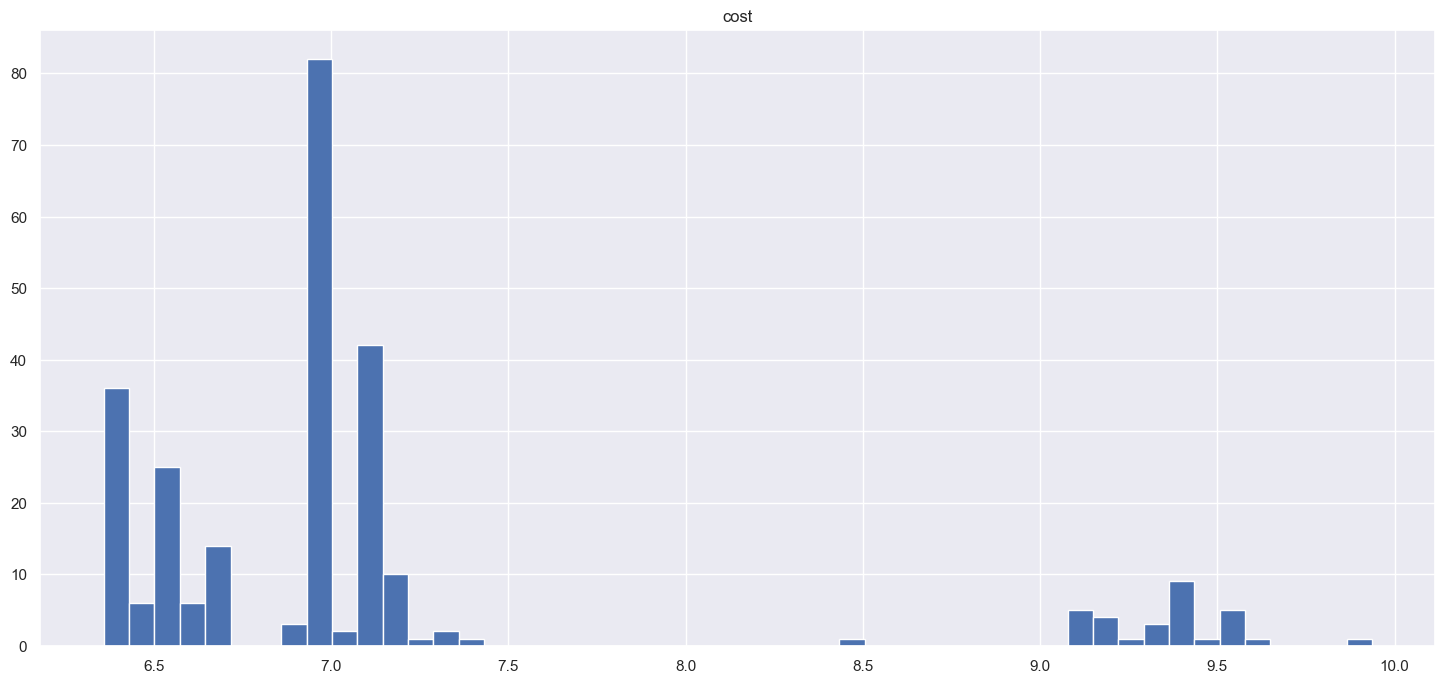

In [13]:
valor_medio.hist(bins=50);

# 2.6 Export PKL
Não há essa necessidade